In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [164]:
# Fetching data
data = pd.read_csv('Housing Price data set.csv')
data=data.drop(['Unnamed: 0','driveway','recroom','fullbase','airco','prefarea', 'gashw'],axis=1)
# di = {'no': 0, 'yes': 1}
# data=data.replace({'driveway':di,'recroom':di,'fullbase':di,'gashw':di,'airco':di,'prefarea':di})
mean = data.mean()[0]
stddev = data.std()[0]
data = (data - data.mean())/data.std()
data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [165]:
# Separate out the Feature and Target matrices
data=np.asarray(data)
Y=data[:,0:1]
X=data[:,1:]
one = np.ones(len(X))
one = [one]
one = np.asarray(one)
X = np.concatenate((one.T,X),axis=1)
split_ratio = 0.7
split = int(split_ratio * X.shape[0])
X_test = X[split+1:,:]
X_train = X[:split+1, :]
Y_test = Y[split+1:,:]
Y_train = Y[:split+1, :]

In [166]:
# Cost Function
def computeCost(X,y,theta):
    tobesummed = np.power(((X.dot(theta.T))-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def denormalise_price(price):
    global mean
    global stddev
    ret = price * stddev + mean
    return ret

def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        error += abs(actual[i] - predicted[i]) / actual[i]
    error /= len(actual)
    return error[0]*100

In [167]:
# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha, lam):
    cost = []
    lam_matrix = lam * np.ones(theta.shape)
    lam_matrix[0][0] = 0
    for i in range(iters):
        theta = theta*(1- lam_matrix / len(X)) - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
#         cost.append(computeCost(X, y, theta))   
    return theta,cost


In [168]:
#Normal equation
def normalEquation(X,Y,lam):
    lam_matrix = lam * np.identity(X.shape[1])
    lam_matrix[0][0] = 0
    theta = np.linalg.inv(X.T.dot(X) + lam_matrix).dot(X.T).dot(Y)
    return theta

In [169]:
theta = np.zeros([1,X.shape[1]])
alpha = .5
iters = 1000
# Running the Gradient Descent Function for various values of lambda
error_matrix = []
lam_range = 100
for lam in range(lam_range):
    g,cost = gradientDescent(X_train,Y_train,theta,iters,alpha, lam)
    Y_pred = X_test.dot(g.T)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_matrix.append(error)
optimal_lambda = 0
min_error = 150
for i in range(len(error_matrix)):
    if error_matrix[i] < min_error:
        optimal_lambda = i
        min_error = error_matrix[i]
print("Minimum Error percenatage: ", min_error)
print("Optimal Lambda : ", optimal_lambda)

Minimum Error percenatage:  16.314179610098222
Optimal Lambda :  68


Text(0.5, 1.0, 'Percentage Error vs. Lambda(Gradient Descent)')

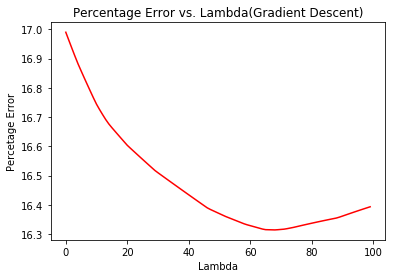

In [170]:
# Percenatge error vs Lmbda plot
fig, ax = plt.subplots()  
ax.plot(np.arange(lam_range), error_matrix, 'r')
ax.set_xlabel('Lambda') 
ax.set_ylabel('Percetage Error')  
ax.set_title('Percentage Error vs. Lambda(Gradient Descent)') 

In [171]:
# Normal Equation
error_mat = []
for lam in range(1000):
    theta = normalEquation(X,Y,lam)
    Cost = computeCost(X_train,Y_train,theta.T)
    Y_pred = X_test.dot(theta)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_mat.append(error)
    
optimal_lambda = 0
min_error = 150
for i in range(len(error_mat)):
    if error_mat[i] < min_error:
        optimal_lambda = i
        min_error = error_mat[i]
print("Minimum Error percenatage: ", min_error)
print("Optimal Lambda : ", optimal_lambda)

Minimum Error percenatage:  15.753604334541038
Optimal Lambda :  160


Text(0.5, 1.0, 'Percentage Error vs. Lambda(Normal Equation)')

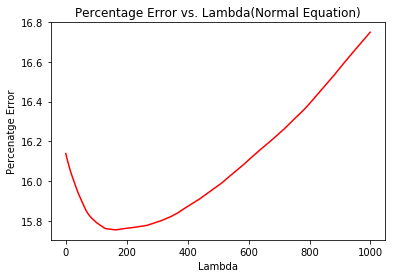

In [172]:
# Percenatge error vs Lmbda plot
fig, ax = plt.subplots()  
ax.plot(np.arange(1000), error_mat, 'r')  
ax.set_xlabel('Lambda') 
ax.set_ylabel('Percenatge Error')  
ax.set_title('Percentage Error vs. Lambda(Normal Equation)') 